### This notebook analyzes Pittsburgh arrest data in the different neighborhoods of the city

First, I imported all of the packages I will need

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Then, I loaded the file containing the arrest data.

In [2]:
arrest_data = pd.read_csv("arrest_data.tsv", sep="\t")
arrest_data

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51478,2042082,21177644,65.0,M,W,2021-10-25T17:57:00,"2800 Block Murray AV Pittsburgh, PA 15217",2706 Terroristic Threats. / 2710 Ethnic Intimi...,"2800 Block Murray AV Pittsburgh, PA 15217",Squirrel Hill South,4,1414.0,NaN,NaN,0.000000,0.000000
51479,2042083,21018883,16.0,M,B,2021-10-14T18:30:00,"3100 Block Bergman ST Pittsburgh, PA 15204",2706 Terroristic Threats.,"2900 Block Merwyn AV Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.050424,40.455730
51480,2042084,21059997,16.0,M,B,2021-10-14T18:20:00,"3100 Block Bergman ST Pittsburgh, PA 15204",2701 Simple Assault. / 2705 Recklessy Endanger...,"3100 Block Bergman ST Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.054871,40.456894
51481,2042085,21163161,16.0,M,B,2021-10-17T12:30:00,"600 Block 1st AV Pittsburgh, PA 15219",2702 Aggravated Assault.,"1500 Block Beechview AV Pittsburgh, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.025139,40.412876


I showed which are the 5 neighborhoods with the most arrests and the 5 with the least arrests.

In [3]:
# plot data
data = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()
data

Central Business District    3155
South Side Flats             2665
Carrick                      1841
East Allegheny               1707
Homewood South               1673
                             ... 
Regent Square                  26
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

This is a horizontal bar graph of all arrests for every neighborhood, which is entirely illegible

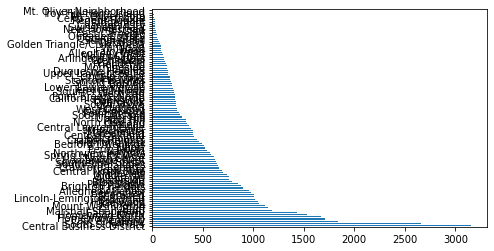

In [23]:
# unchanged neighborhood arrest data
data.plot(kind='barh')

This is a graph of the 20 neighborhoods with the most arrests in the city.

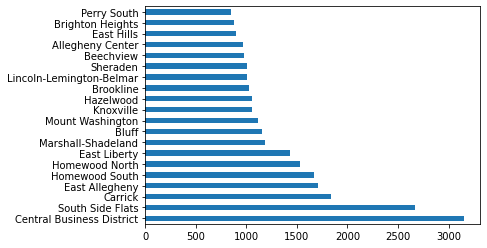

In [36]:
# 20 neighborhoods with most arrests
data.head(20).plot(kind='barh')

This graph shows the 20 neighborhoods in the city with the fewest arrests.

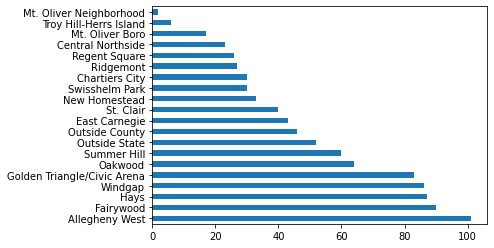

In [25]:
# 20 neighborhoods with the fewest arrests
data.tail(20).plot(kind='barh')

I created a query mask to help me graph the incidents specifically in Mount Oliver Borough

In [26]:
# all offenses from arrests in Mt. Oliver Borough
query_mask = arrest_data['INCIDENTNEIGHBORHOOD'] == "Mt. Oliver Boro"
mt_oliver_boro = arrest_data[query_mask]
mt_oliver_boro["OFFENSES"].value_counts()

903 Criminal Conspiracy. / 2701 Simple Assault.                                                                                                                                                                                                                      3
2709.1 Stalking Conduct or Repeatedly Acts Including Follows                                                                                                                                                                                                         1
5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF                                                                                           1
2706 Terroristic Threats. / 2709 Harassment (Non-Specific)                                                                                                                                                         

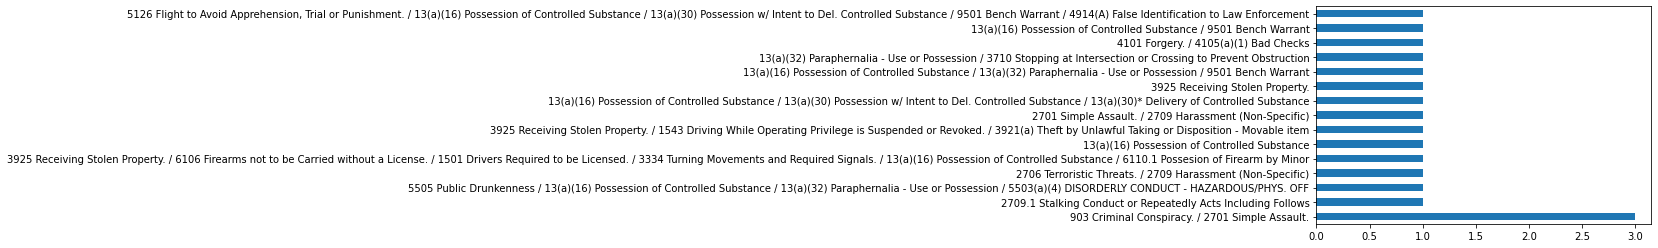

In [27]:
# Offenses in Mt. Oliver as a bar graph
mt_oliver_boro["OFFENSES"].value_counts().plot(kind='barh')

Since it's pretty hard to read that graph, I made a separate dataframe using letters to show each reason for an arrest, with a key below.

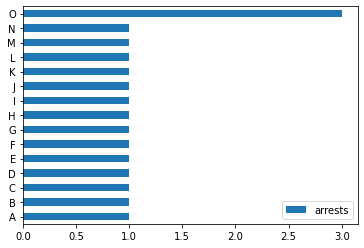

In [28]:
# Use new DataFrame to simplify bar graph
plot_data = pd.DataFrame(
            {"arrests": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,3]},
            index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M","N","O"])
plot_data.plot(kind="barh")

Key for bar graph above
* A: 13(a)(32) Paraphernalia - Use or Possession / 3710 Stopping at Intersection or Crossing to Prevent Obstruction
* B: 5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF
* C: 3925 Receiving Stolen Property. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3921(a) Theft by Unlawful Taking or Disposition - Movable item
* D: 3925 Receiving Stolen Property.
* E: 5126 Flight to Avoid Apprehension, Trial or Punishment. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 9501 Bench Warrant / 4914(A) False Identification to Law Enforcement                          1
3925 Receiving Stolen Property. 
* F: 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant
* G: 2701 Simple Assault. / 2709 Harassment (Non-Specific)
* H: 13(a)(16) Possession of Controlled Substance
* I: 4101 Forgery. / 4105(a)(1) Bad Checks
* J: 3925 Receiving Stolen Property. / 6106 Firearms not to be Carried without a License. / 1501 Drivers Required to be Licensed. / 3334 Turning Movements and Required Signals. / 13(a)(16) Possession of Controlled Substance / 6110.1 Possesion of Firearm by Minor    1
4101 Forgery. / 4105(a)(1) Bad Checks
* K: 2709.1 Stalking Conduct or Repeatedly Acts Including Follows
* L: 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(30)* Delivery of Controlled Substance
* M: 13(a)(16) Possession of Controlled Substance / 9501 Bench Warrant
* N: 2706 Terroristic Threats. / 2709 Harassment (Non-Specific)  
* O: 903 Criminal Conspiracy. / 2701 Simple Assault.


The graph above shows reasons for each arrest, but some arrests were because of multiple crimes, so the one below is each individual crime committed in the Mt. Oliver Borough.

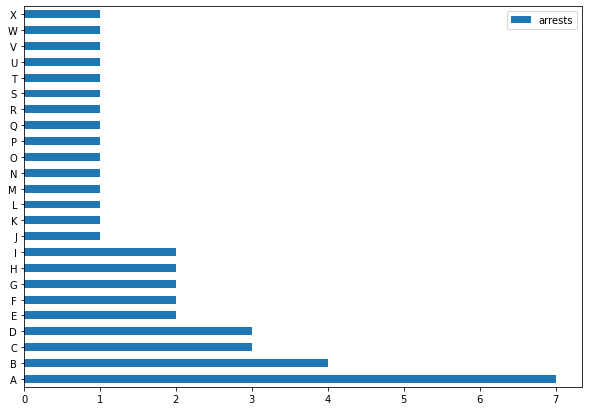

In [41]:
plot_data = pd.DataFrame(
            {"arrests": [7,4,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]},
            index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N","O", "P", "Q", "R", "S","T",
                  "U", "V", "W", "X"])
plot_data.plot(kind="barh", figsize=(10,7))

Key for bar graph above:
* A: 13(a)(16) Possession of Controlled Substance
* B: 3925 Receiving Stolen Property
* C: 13(a)(32) Paraphernalia - Use or Possession
* D: 9501 Bench Warrant
* E: 2701 Simple Assault
* F: 2709 Harassment (Non-Specific)
* G: 4101 Forgery
* H: 4105(a)(1) Bad Checks
* I: 13(a)(30) Possession w/ Intent to Del. Controlled Substance
* J: 3710 Stopping at Intersection or Crossing to Prevent Obstruction
* K: 5505 Public Drunkenness
* L: 5503(a)(4) DISORDERLY CONDUCT - HARARDOUS/PHYS.OFF
* M: 1543 Driving While Privilege is Suspended or Revoked
* N: 3921(a) Thefy by Unlawful Taking or Disposition - Movable Object
* O: 5126 Flight to Avoid Apprehension, Trial, or Punishment
* P: 4914(A) False Identification to Law Enforcement
* Q: 6106 Firearms not to be Carried without a License
* R: 1501 Drivers Required to be Licensed
* S: 3334 Turning Movements and Required Signals
* T: 6610.1 Possession of Firearm by Minor
* U: 2709.1 Stalking Conduct or Repeatedly Acts Including Follows
* V: 13(a)(30)* Delivery of a Controlled Substance
* W: 2706 Terroristic Threats
* X: Criminal Conspiracy

As you can see, the majority of the crimes are relatively minor offenses, and very few are in any way violent.

Next, I uploaded a map of the neighborhoods in the city for a visual representation of the amount of crime in each neighborhood.

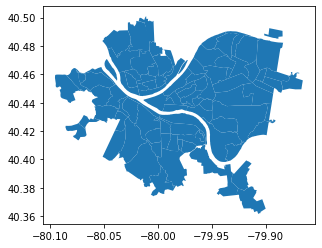

In [5]:
# get the blank map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods_new/neighborhoods_new.shp")
neighborhoods.plot()

I merged the incident neighborhood data with the map of the city

In [21]:
# merge the neighborhood data with the map
incidents_map = neighborhoods.merge(data, how='left', left_on='hood', right_on=value.index)
incidents_map[['hood', 'INCIDENTNEIGHBORHOOD','geometry']].head()

,hood,INCIDENTNEIGHBORHOOD,geometry
0,Mount Oliver Borough,NaN,"MULTIPOLYGON (((-79.98819 40.41852, -79.98819 ..."
1,Central Oakland,406.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
2,North Oakland,338.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
3,West Oakland,244.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
4,Crawford-Roberts,653.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."


Then plotted the map with a color gradient.

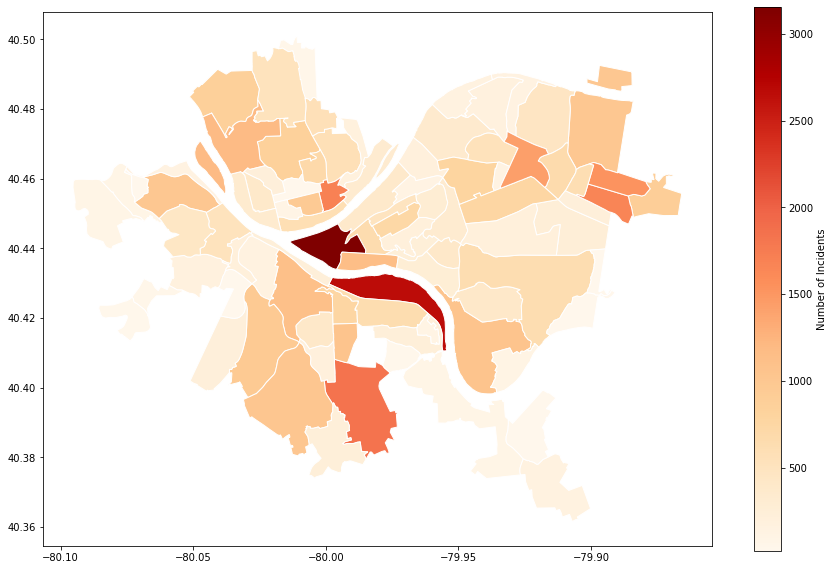

In [22]:
# Map of where arrests occurred
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', 
                  cmap='OrRd',
                  edgecolor="white",
                  legend=True,
                  legend_kwds={'label': "Number of Incidents"},
                  figsize=(15, 10),
                  )

As you can see, Mount Oliver Borough is almost white, showing that it has had very few arrests. When combined with the other datasets, it is clear that Mt. Oliver Borough is the safest neighborhood in the city.